   # HEART_DISEASE_PREDICTION_PROJECT

In [127]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

In [128]:
#loading dastaset
df_data= pd.read_csv("heart.csv")

# DATA ANALYSIS

In [129]:
#printing first 5 enteries
df_data.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [130]:
df_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [131]:
df_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [132]:
#target=1 (the person is having heart disease)
#target=0 (the person is not having heart disease)

count_having_disease = len(df_data[df_data.target == 1])
count_not_having_disease = len(df_data[df_data.target == 0])
print("the percentage of people having disease are:{:.2f}%".format((count_having_disease / (len(df_data.target))*100)))
print("the percentage of people not  having disease are:{:.2f}%".format((count_not_having_disease / (len(df_data.target))*100)))




the percentage of people having disease are:54.46%
the percentage of people not  having disease are:45.54%


# HISTOGRAM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3E750D9B0>,
      dtype=object)

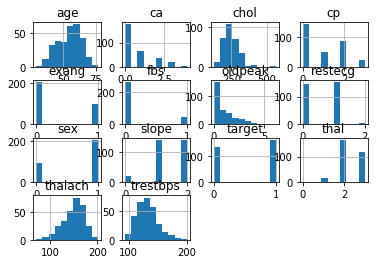

In [133]:
df_data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3E783C9E8>]],
      dtype=object)

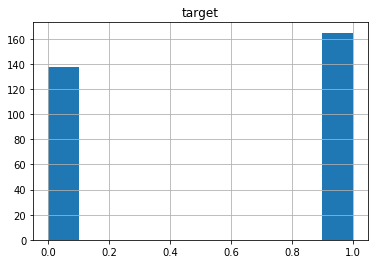

In [134]:
#Let’s take a look at the plots. It shows how each feature and label is distributed along different ranges,
#which further confirms the need for scaling. Next, wherever we see discrete bars, it basically means that
#each of these is actually a categorical variable. We will need to handle these categorical variables before
#applying Machine Learning. Our target labels have two classes, 0 for no disease and 1 for disease.
df_data.hist('target')

# BAR plot for TARGET class

In [135]:
#It is essential to work on dataset which is balanced otherwise whole model training is useless.
#for example a dataset contain 100 people with 99 non-patients and 1 patient,without even training and learning 
#the model will always  predict the new person non-patient with 99% accuracy.However,as we are more interested 
#to find  1 patient, we need balanced dataset for model to actually learn.

Text(0.5,1,'count of each target class')

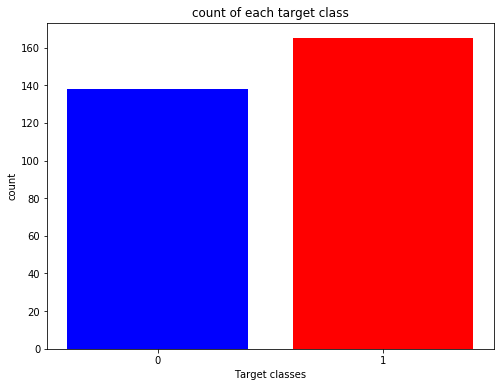

In [136]:
rcParams['figure.figsize']=8,6
plt.bar(df_data['target'].unique(),df_data['target'].value_counts(),color  = ['red','blue'])
plt.xticks([0,1])
plt.xlabel('Target classes')
plt.ylabel('count')
plt.title("count of each target class")




In [137]:
#From the plot we can see that the classes are almost  balanced and now we can to data preprocessing.


# PRE-PROCESSING

# Creating Dummies of selected columns

In [138]:
#To work with categorical variables ,we should break each categorical column into dummys columns with 1s and 0s.
dummy=pd.get_dummies(df_data,columns=['sex','cp','fbs','exang','restecg','slope','thal'],drop_first=True).head()
dummy.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,exang_1,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0


In [139]:
#SCALING
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
df_data[columns_to_scale]=standardScaler.fit_transform(df_data[columns_to_scale])
df_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [140]:
#PCA
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
pca.fit(df_data)
x_pca=pca.transform(df_data)

In [141]:
df_data.shape

(303, 14)

In [142]:
x_pca.shape

(303, 2)

(-10, 5)

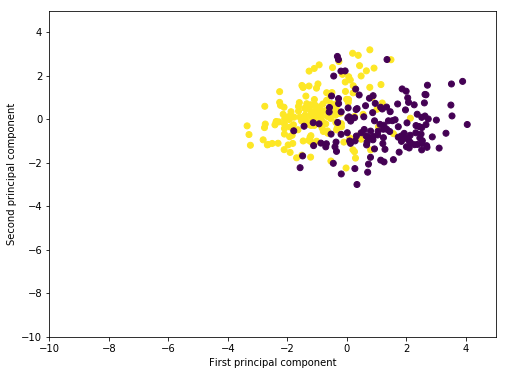

In [143]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_data['target'])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
ax=plt.gca()
ax.set_ylim(-10,5)
ax.set_xlim(-10,5)

In [212]:

principal_df = pd.DataFrame(data=x_pca , columns=['First principal component', 'Second principal component'])
principal_df.head()

,First principal component,Second principal component
0,0.117356,1.808899
1,-1.145382,0.026054
2,-1.641566,-0.478401
3,-1.369773,-0.024514
4,-0.296963,0.265628


In [213]:
final_df= pd.concat([principal_df,df_data['target']],axis=1)
final_df.head()

,First principal component,Second principal component,target
0,0.117356,1.808899,1
1,-1.145382,0.026054,1
2,-1.641566,-0.478401,1
3,-1.369773,-0.024514,1
4,-0.296963,0.265628,1


In [214]:
#creating a training set
X = round(principal_df)
X.head(10)

,First principal component,Second principal component
0,0.0,2.0
1,-1.0,0.0
2,-2.0,-0.0
3,-1.0,-0.0
4,-0.0,0.0
5,-0.0,-0.0
6,-0.0,1.0
7,-2.0,-0.0
8,-1.0,2.0
9,-1.0,1.0


In [215]:
#creating a target set
y = final_df.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [216]:

X_train.head()

,First principal component,Second principal component
137,-1.0,0.0
106,0.0,2.0
284,1.0,-1.0
44,-2.0,1.0
139,2.0,-1.0


In [217]:
y_train.head()

137    1
106    1
284    0
44     1
139    1
Name: target, dtype: int64

In [218]:
#creating training and testing dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
#here training set is 70% of 303 i.e 212 and testing set or target set is 30% of 303 i.e 91


In [219]:
#X_data=dummy.drop('target',axis=1)

In [220]:
#y_data=dummy.target

In [221]:
#creating training and testing dataset for decision tree 
#from sklearn.cross_validation import train_test_split
#X_data_train, X_data_test, y_data_train, y_data_test = train_test_split( X_data, y_data, test_size=0.3, random_state=0)

# SUPPORT VECTOR MACHINE ALGORITHM

In [222]:
#from sklearn.svm import SVC
#model= SVC(kernel='linear')
#model.fit(X_train,y_train)
#prediction = model.predict(X_test)

In [223]:
#from sklearn.metrics import classification_report

In [224]:
#print(classification_report(y_test,prediction))

In [225]:
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,prediction))

In [226]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5,1,'Support Vector Classifier scores for different kernels')

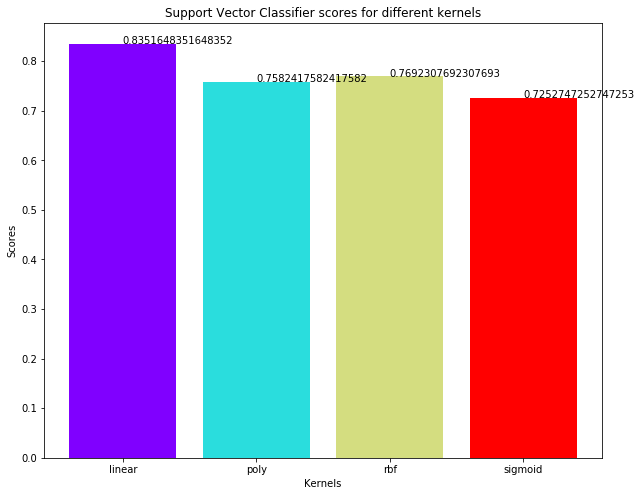

In [227]:
plt.figure(figsize=(10,8))
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

# K Neighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#knn_model = KNeighborsClassifier(n_neighbors=9)
#knn_model.fit(X_train,y_train)
#prediction2= knn_model.predict(X_test)

In [32]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test,prediction2))

In [33]:
knn_scores=[]
for k in range(1,21):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train,y_train)
        knn_scores.append(knn_model.score(X_test,y_test))
     

Text(0.5,1,'K Neighbors Classifier scores for different K values')

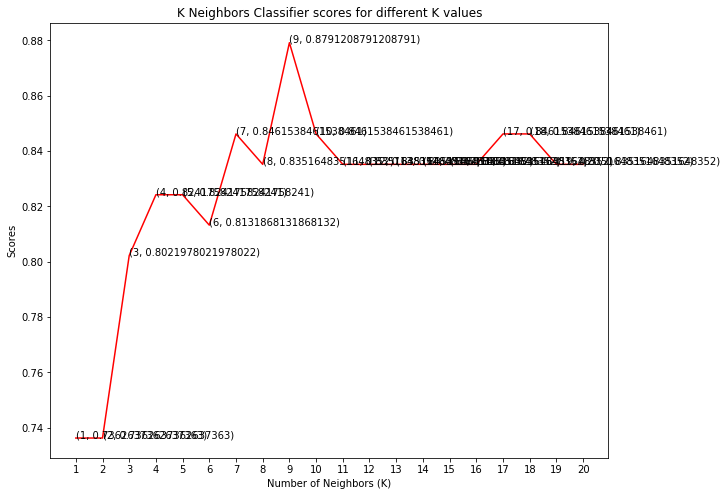

In [34]:
plt.figure(figsize=(10,8))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [35]:
#from sklearn.tree import DecisionTreeClassifier

In [71]:

#dt_score=[]
#for i in range(1,len(df_data.columns)+1):
 #   dt_model = DecisionTreeClassifier(dummy,max_features=i,random_state=0)
  #  dt_model.fit(X_data_train,y_data_train)
   # dt_score.append(dt_model.score(X_data_test,y_data_test))

In [72]:
#plt.plot([i for i in range(1, len(X_data.columns) + 1)], dt_score, color = 'green')
#for i in range(1, len(X_data.columns) + 1):
 #   plt.text(i, dt_score[i-1], (i, dt_score[i-1]))
#plt.xticks([i for i in range(1, len(X_data.columns) + 1)])
#plt.xlabel('Max features')
#plt.ylabel('Scores')
#plt.title('Decision Tree Classifier scores for different number of maximum features')

# RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5,1,'Random Forest Classifier scores for different number of estimators')

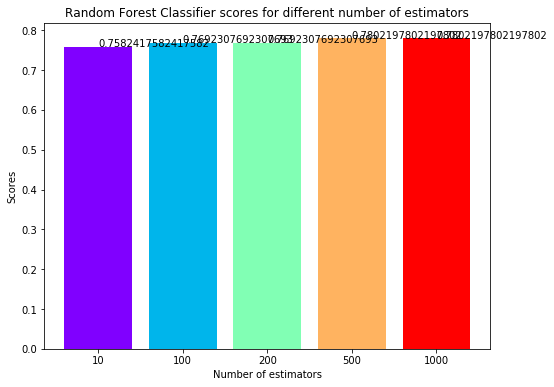

In [39]:

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks([i for i in range(len(estimators))],[str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')